## Problema 1

En una clase de matrices aleatorias el profesor intentó reproducir la tabla de valores críticos para el estadístico R propuesto por Onatski (2009), sin embargo los errores relativos son muy altos aún, del orden del 1%. Ayude al profesor generando una tabla de significancias más precisa para mostrar en futuros cursos. Apoyese de las diapositivas y de las referencias que considere necesarias.

In [18]:
# librerías
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# Parámetros
its = 100000
n = 500
kmax=8


In [24]:
#aqui guardaremos los valores de r estadistico
r_acum = np.zeros((its,kmax))


for i in range(its):
    #construccion de la matriz GUE
    X = np.random.normal(0, 1,(n,n)) + 1j * np.random.normal(0, 1,(n,n))
    X_gue = (X + np.conj(np.transpose(X) )) / 2
    
    #eigenvalores
    e, v = np.linalg.eigh(X_gue)
    #ordenamos
    e = -np.sort(-e)
    #escalamos
    e = (n **(2/3))*(e-2)
    #solo nos quedamos con 10
    e10 = e[:10]
    
    #aqui debo sacar la distribucion de los eigenvalores
    maxs = np.empty(0)
    
    #lo hago para 8 diferencias (solo que por indices inicia en 0)
    for j in range(kmax):
        #el cociente para esa iteracion
        r_est = (e10[j]- e10[j+1])/(e10[j+1]-e10[j+2])
        #voy agregando todos los cocientes
        maxs = np.concatenate((maxs,r_est), axis=None)
        #elijo el maximo
        r_acum[i,j] = np.max(maxs)
       

KeyboardInterrupt: 

In [26]:
i

35183

In [22]:
#no correr
#Rdisprueba1 = Rdist 

In [27]:
Rdist = pd.DataFrame(r_acum[:(i-1),:])
#escojo los cuantiles a evaluar
cuantiles = [.85,.9,.91,.92,.93,.94,.95,.96,.97,.98,.99]

quant = Rdist.quantile(cuantiles,axis=0)
quant.columns = ['k1-k0 = 1', "2", "3","4","5","6","7","8"]
quant.index   = ["15", "10", "9","8","7","6","5","4","3","2","1"]

In [31]:
# Para los valores propuestos me queda esta matriz con 35,183 corridas y n=500
quant

,k1-k0=1,2,3,4,5,6,7,8
15,2.754105,3.635700,4.142212,4.551937,4.905327,5.190805,5.475951,5.701527
10,3.356182,4.310272,4.905202,5.394484,5.756119,6.113674,6.450298,6.701502
9,3.522470,4.505255,5.117135,5.634288,5.998791,6.364765,6.710967,6.988608
8,3.722331,4.728739,5.377437,5.875036,6.304329,6.667131,7.033594,7.325612
7,3.935519,5.013468,5.672016,6.217135,6.621846,7.048634,7.403703,7.709232
6,4.219384,5.341217,6.009322,6.587020,7.054738,7.445243,7.879326,8.199562
5,4.574162,5.750882,6.455310,7.076358,7.548274,8.008841,8.405343,8.752230
4,5.047638,6.270577,7.066902,7.692666,8.230802,8.688815,9.108628,9.486208
3,5.677471,7.056954,7.827067,8.503090,9.099103,9.671562,10.173134,10.520640
2,6.595529,8.132868,9.088795,9.915581,10.539545,11.224938,11.674310,12.009826


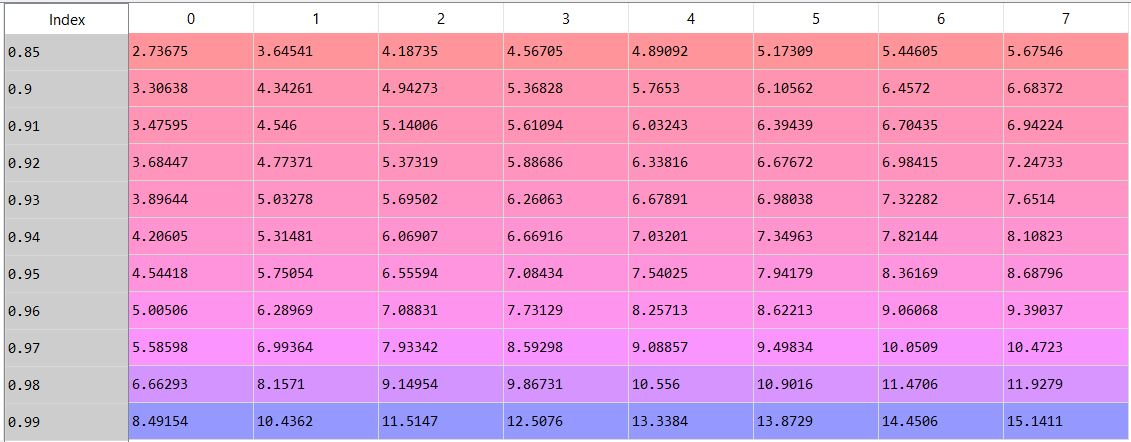

In [30]:
# En Spyder corri este mismo ejercicio para 30,000 iteraciones y n=300
from IPython.display import Image
Image(filename='examen_ejercicio1.jpg')

## Problema 2
* **¿Como implementaría un test GOE?**


* **¿Cuáles considera que sean los alcances y limitaciones de la aplicación de las técnicas de matrices aleatorias en la ciencia de datos?**

Que dado que en muchos temas de ciencia de datos, interfiere el termino de alta dimensionalidad, algunas técnicas de matrices aleatorias están muy vinculadas a este tratamiento, dado que al ser tan grandes ya se pueden aplicar términos asintóticos.
También como veíamos en clase, para saber cuales datos pueden representar ruido y cuales no, se podría aplicar para obtener variables significantes para reducción de dimensión.


* **¿Cuál es la principal característica de las matrices aleatorias?**

A mi parecer, así como trabajamos las variables aleatorias unidimensionales para modelar, probar hipótesis y en general hacer inferencia, se pueden aplicar métodos equivalentes a las matrices aleatorias, pues se componen de números aleatorios que siguen cierta distribución.

Esto nos ayuda porque existen problemas que tienen que tratarse en conjunto como matriz, y no como vectores o variables aleatorias.

* **¿Cómo explicaría que son las matrices aleatorias a un estudiante de pregrado?**

Son una extensión del concepto de variables aleatorias solo que en una expresión más amplia. Existen ocasiones en que quieres trabajar todo un conjunto de datos, y sabes o intuyes que tienen una distribución, o su matriz de correlación tiene una distribución entonces para eso necesitamos trabajar con matrices aleatorias.